In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker
from plottingFunctions import plot_hist_boxplot

plt.style.use("ggplot")

https://eigentaste.berkeley.edu/dataset/


In [5]:
jokes_df = pd.read_excel("jokes_dataset.xls", header=None, usecols=range(1, 151))

In [6]:
jokes_df.shape


(54905, 150)

In [7]:
jokes_df.head()


,1,2,3,4,5,6,7,8,9,10,...,141,142,143,144,145,146,147,148,149,150
0,99,99,99,99,0.21875,99,-9.28125,-9.28125,99,99,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
1,99,99,99,99,-9.68750,99,9.93750,9.53125,99,99,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
2,99,99,99,99,-9.84375,99,-9.84375,-7.21875,99,99,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
3,99,99,99,99,6.90625,99,4.75000,-5.90625,99,99,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
4,99,99,99,99,-0.03125,99,-9.09375,-0.40625,99,99,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0


In [8]:
jokes_df = jokes_df.astype(float)
jokes_df.dtypes


1      float64
2      float64
3      float64
4      float64
5      float64
        ...   
146    float64
147    float64
148    float64
149    float64
150    float64
Length: 150, dtype: object

In [9]:
jokes_df = jokes_df.replace(99, np.nan)
jokes_df.head()


,1,2,3,4,5,6,7,8,9,10,...,141,142,143,144,145,146,147,148,149,150
0,NaN,NaN,NaN,NaN,0.21875,NaN,-9.28125,-9.28125,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,-9.68750,NaN,9.93750,9.53125,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,-9.84375,NaN,-9.84375,-7.21875,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,6.90625,NaN,4.75000,-5.90625,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,-0.03125,NaN,-9.09375,-0.40625,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


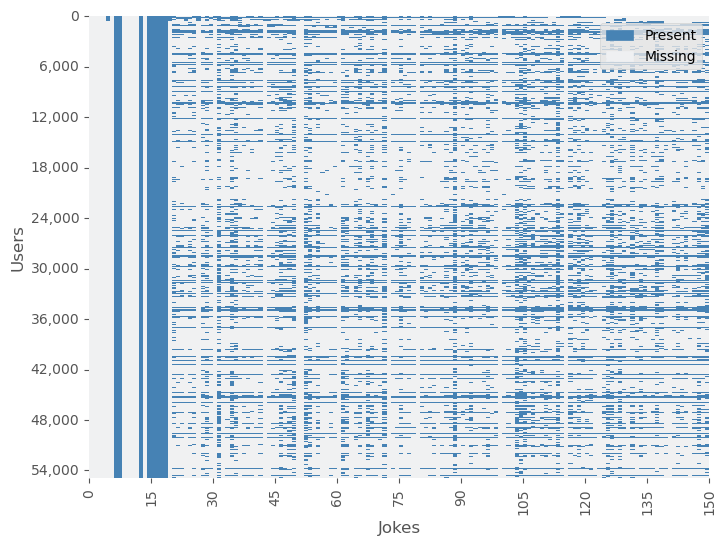

In [10]:
# Create DataFrame with some missing values
df = jokes_df
# Create a boolean mask for missing values
missing = df.notna()

# Create colormap
cmap = sns.light_palette("steelblue", as_cmap=True)

# Set figure size
plt.figure(figsize=(8, 6))  # width, height in inches

# Use Seaborn to visualize missingness
sns.heatmap(missing, cbar=False, cmap=cmap)

# Create legend
missing_patch = mpatches.Patch(color=cmap(0.99), label="Present")
not_missing_patch = mpatches.Patch(color=cmap(1), label="Missing")
plt.legend(handles=[missing_patch, not_missing_patch], loc="upper right")

# Add labels
plt.xlabel("Jokes")
plt.ylabel("Users")

# Format y-axis labels
formatter = ticker.FuncFormatter(lambda x, pos: "{:,.0f}".format(x))
plt.gca().yaxis.set_major_formatter(formatter)

# Limit the number of ticks on the y-axis
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(10))
plt.gca().yaxis.set_major_formatter(formatter)

# Limit the number of ticks on the x-axis
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(10))
plt.gca().xaxis.set_major_formatter(formatter)

plt.show()


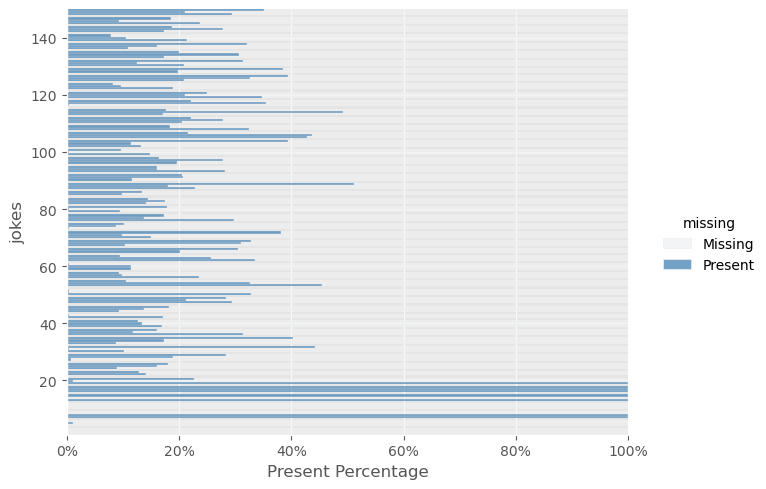

In [11]:
# Melt the DataFrame and rename the columns
melted_df = jokes_df.isna().melt(var_name="jokes", value_name="missing")

# Map the missing values to 'Present' and 'Missing'
melted_df["missing"] = melted_df["missing"].map({False: "Present", True: "Missing"})

# Create the color palette
palette = {
    "Present": sns.light_palette("steelblue", 2)[1],
    "Missing": sns.light_palette("steelblue", 2)[0],
}

sns.displot(
    data=melted_df,
    y="jokes",
    hue="missing",
    multiple="fill",
    palette=palette,
    height=5,
    aspect=4 / 3,
)

# Format x-axis as percentage
plt.gca().xaxis.set_major_formatter(ticker.PercentFormatter(1))

# Set x-axis label
plt.xlabel("Present Percentage")

plt.show()


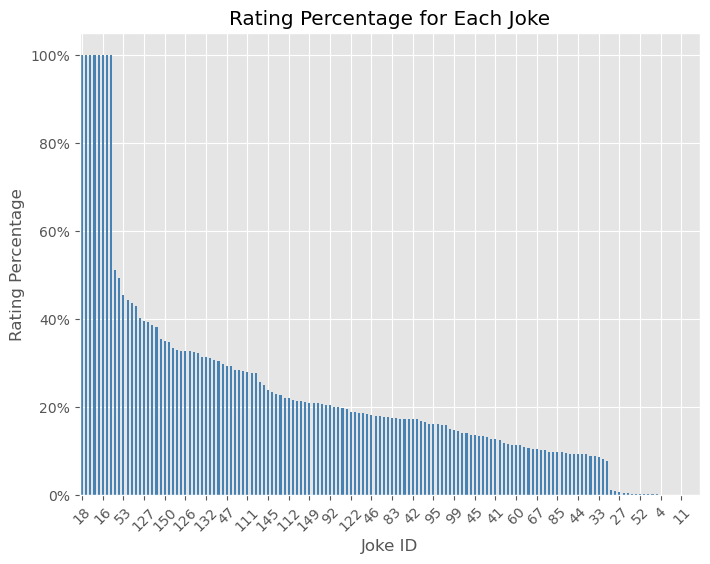

In [12]:
# Calculate the rating percentage for each joke
df = jokes_df
rating_percentage = df.count() / len(df)

# Sort jokes by rating percentage in descending order
rating_percentage_sorted = rating_percentage.sort_values(ascending=False)

sns.light_palette("steelblue", 2)[1]

plt.figure(figsize=(8, 6))
rating_percentage_sorted.plot(kind="bar", color="steelblue")
plt.ylabel("Rating Percentage")
plt.xlabel("Joke ID")
plt.title("Rating Percentage for Each Joke")

# Modify x-ticks
n = 5  # Show every nth x-tick, adjust as needed
plt.xticks(
    range(0, len(rating_percentage_sorted), n),
    rating_percentage_sorted.index[::n],
    rotation=45,
)  # Rotate labels for better readability

# Modify y-ticks to show percentage
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(1))

plt.show()

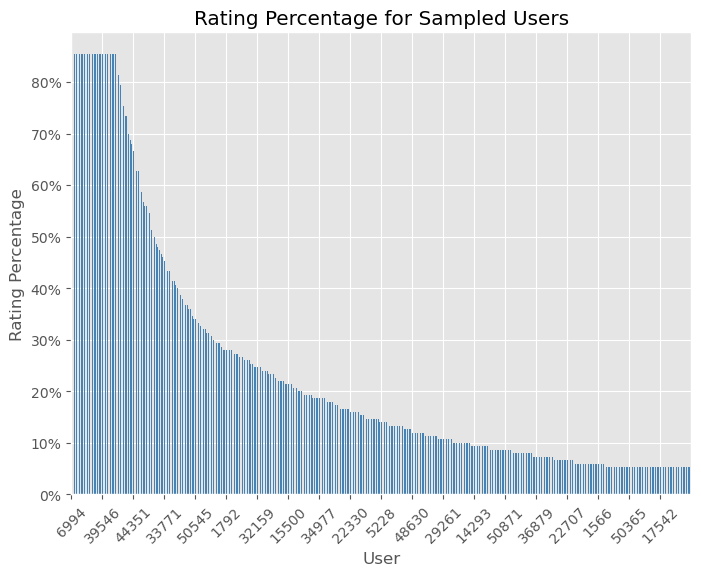

In [14]:
# Calculate the rating percentage for each user
rating_percentage_user = jokes_df.count(axis=1) / len(df.columns)

# Randomly sample 1000 users
np.random.seed(42)  # Set random seed for reproducibility
users_to_plot = np.random.choice(rating_percentage_user.index, size=1000, replace=False)
rating_percentage_user_sampled = rating_percentage_user.loc[users_to_plot]

# Sort users by rating percentage in descending order
rating_percentage_user_sorted = rating_percentage_user_sampled.sort_values(
    ascending=False
)

plt.figure(figsize=(8, 6))
rating_percentage_user_sorted.plot(kind="bar", color="steelblue")
plt.ylabel("Rating Percentage")
plt.xlabel("User")
plt.title("Rating Percentage for Sampled Users")

# Modify x-ticks
n = 50
plt.xticks(
    range(0, len(rating_percentage_user_sorted), n),
    rating_percentage_user_sorted.index[::n],
    rotation=45,
)

# Modify y-ticks to show percentage
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(1))

plt.show()

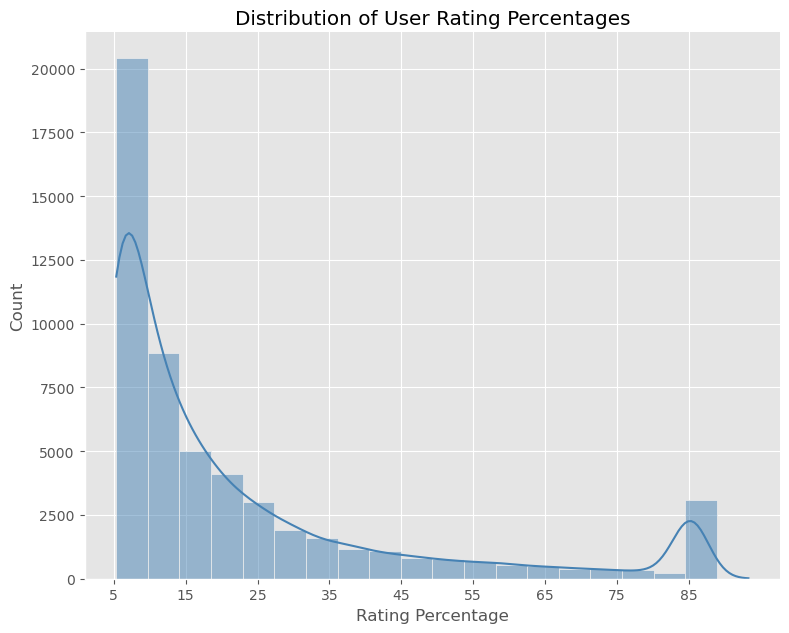

In [25]:
# Calculate the rating percentage for each user
rating_percentage_user = df.count(axis=1) / len(df.columns)

sns.displot(
    rating_percentage_user * 100,
    bins=20,
    color="steelblue",
    kde=True,
    height=6,
    aspect=4 / 3,
)
plt.xlabel("Rating Percentage")
plt.ylabel("Count")
plt.title("Distribution of User Rating Percentages")

# Generate a list of xticks
xticks = np.arange(
    start=int(min(rating_percentage_user * 100)),
    stop=int(max(rating_percentage_user * 100)) + 1,
    step=10,
)

# Set the xticks
plt.xticks(xticks)

plt.show()

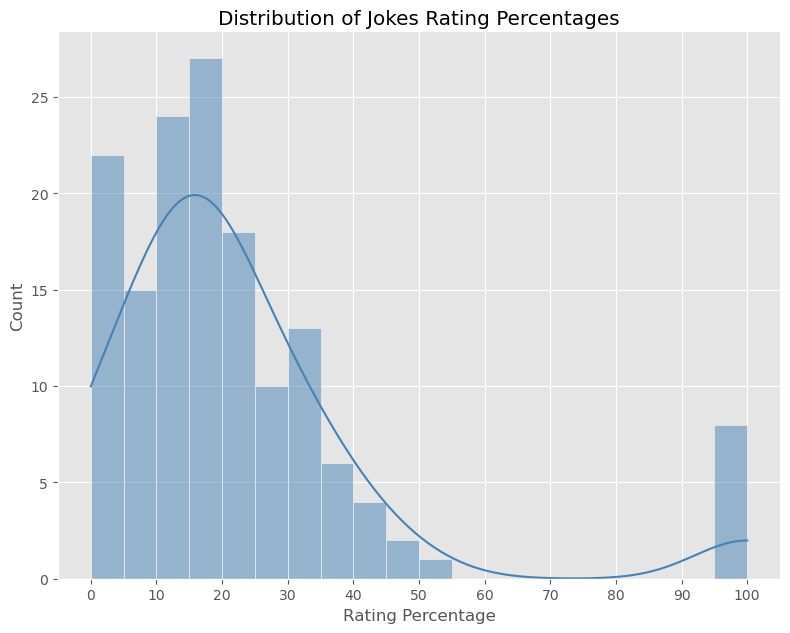

In [28]:
# Calculate the rating percentage for each user
rating_percentage_joke = df.count(axis=0) / df.shape[0]

sns.displot(
    rating_percentage_joke * 100,
    bins=20,
    color="steelblue",
    kde=True,
    height=6,
    aspect=4 / 3,
)
plt.xlabel("Rating Percentage")
plt.ylabel("Count")
plt.title("Distribution of Jokes Rating Percentages")

# Generate a list of xticks
xticks = np.arange(
    start=int(min(rating_percentage_joke * 100)),
    stop=int(max(rating_percentage_joke * 100)) + 1,
    step=10,
)

# Set the xticks
plt.xticks(xticks)

plt.show()


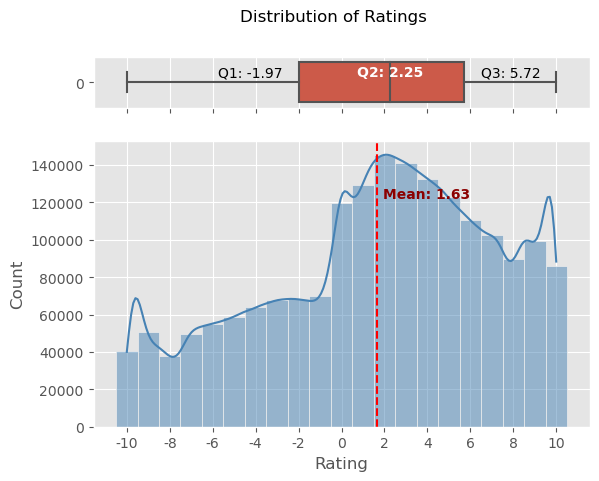

,Value
Metric,
Mean,1.63
Variance,28.01
Standard deviation,5.29
Median,2.25
Q1,-1.97
Q2,2.25
Q3,5.72


In [7]:
# Flatten the dataframe to a 1D array
ratings = jokes_df.values.flatten()
ratings = ratings[~np.isnan(ratings)]

plot_hist_boxplot(ratings, title="Distribution of Ratings")


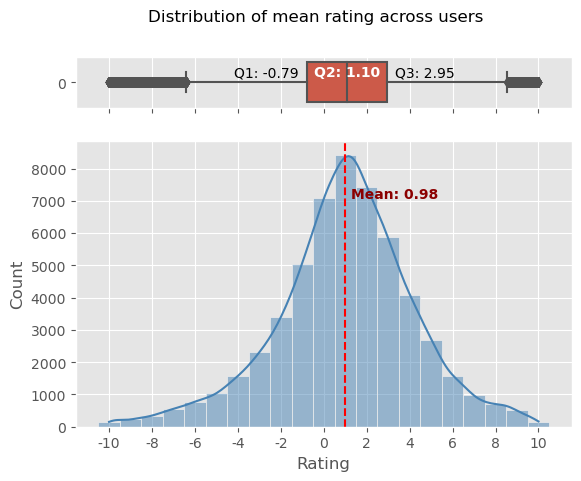

,Value
Metric,
Mean,0.98
Variance,10.42
Standard deviation,3.23
Median,1.10
Q1,-0.79
Q2,1.10
Q3,2.95


In [8]:
# Calculate the mean of each user's ratings
user_means = jokes_df.mean(axis=1)
plot_hist_boxplot(user_means, title="Distribution of mean rating across users")


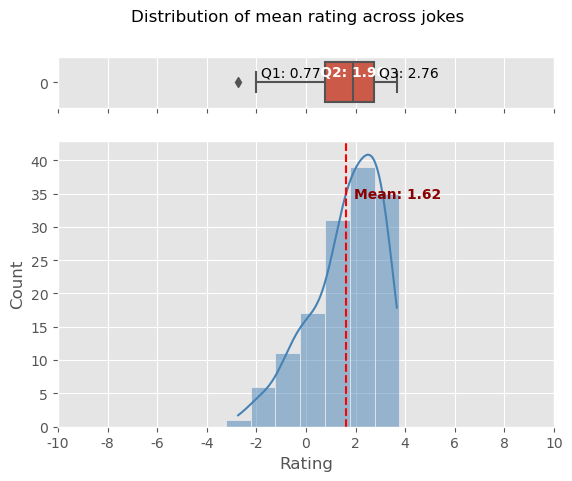

,Value
Metric,
Mean,1.62
Variance,2.02
Standard deviation,1.42
Median,1.90
Q1,0.77
Q2,1.90
Q3,2.76


In [11]:
# Calculate the mean of each jokes's ratings
item_means = jokes_df.mean(axis=0).dropna().values
plot_hist_boxplot(item_means, title="Distribution of mean rating across jokes")


In [17]:
jokes_df.mean(axis=0).dropna()


5     -2.034618
7     -1.943754
8     -0.704781
13    -0.671219
15    -1.436065
         ...   
146    0.205030
147    1.782516
148    2.968233
149    2.394606
150    2.770453
Length: 140, dtype: float64

In [33]:
R = jokes_df.to_numpy()


In [34]:
R.shape


(54905, 150)

In [43]:
print(f"{round((np.count_nonzero(~np.isnan(R))/R.size)*100,2)}% of full entries")


22.37% of full entries
